## North Carolina Clustering Model

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
df = pd.read_csv('comodity2017.csv')
df.head()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,6,99999,06-99999,6,260,06-260,326,4,43,5,4380,391,54,60,N,N,N,N,328.3
1,2,49,482,49-482,47,314,47-314,4541,3,43,14,56,4,1524,1810,N,N,N,N,8425.3
2,3,6,348,06-348,6,348,06-348,4231,4,34,5,255,440,2,5,N,N,N,N,9120.7
3,4,6,260,06-260,6,99999,06-99999,212,4,11,5,250,44912,30,35,N,N,N,N,20.9
4,5,45,273,45-273,45,273,45-273,45431,4,19,5,46,73,9,11,N,N,N,H,1733.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   SHIPMT_ID           1048575 non-null  int64  
 1   ORIG_STATE          1048575 non-null  int64  
 2   ORIG_MA             1048575 non-null  int64  
 3   ORIG_CFS_AREA       1048575 non-null  object 
 4   DEST_STATE          1048575 non-null  int64  
 5   DEST_MA             1048575 non-null  int64  
 6   DEST_CFS_AREA       1048575 non-null  object 
 7   NAICS               1048575 non-null  int64  
 8   QUARTER             1048575 non-null  int64  
 9   SCTG                1048575 non-null  object 
 10  MODE                1048575 non-null  int64  
 11  SHIPMT_VALUE        1048575 non-null  int64  
 12  SHIPMT_WGHT         1048575 non-null  int64  
 13  SHIPMT_DIST_GC      1048575 non-null  int64  
 14  SHIPMT_DIST_ROUTED  1048575 non-null  int64  
 15  TEMP_CNTL_YN   

## Filtering and Data Cleaning 

In [4]:
df.isnull().sum()

SHIPMT_ID             0
ORIG_STATE            0
ORIG_MA               0
ORIG_CFS_AREA         0
DEST_STATE            0
DEST_MA               0
DEST_CFS_AREA         0
NAICS                 0
QUARTER               0
SCTG                  0
MODE                  0
SHIPMT_VALUE          0
SHIPMT_WGHT           0
SHIPMT_DIST_GC        0
SHIPMT_DIST_ROUTED    0
TEMP_CNTL_YN          0
EXPORT_YN             0
EXPORT_CNTRY          0
HAZMAT                0
WGT_FACTOR            0
dtype: int64

In [5]:
df = df.drop(columns=['SHIPMT_ID','ORIG_CFS_AREA','DEST_STATE','DEST_MA','DEST_CFS_AREA','NAICS','QUARTER','SCTG','MODE','TEMP_CNTL_YN','EXPORT_YN','EXPORT_CNTRY','HAZMAT','WGT_FACTOR'])

In [6]:
# filter dataset for North Carolina
nc_df = df[df["ORIG_STATE"] == 37]
nc_df.head()

,ORIG_STATE,ORIG_MA,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED
15,37,172,13565,4500,173,216
22,37,450,1495,1368,51,63
45,37,450,447,54,5,11
53,37,99999,43,1,547,696
54,37,99999,7401,59039,59,71


In [7]:
nc_df = nc_df.drop(columns=['ORIG_STATE','ORIG_MA'])
nc_df.head()

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED
15,13565,4500,173,216
22,1495,1368,51,63
45,447,54,5,11
53,43,1,547,696
54,7401,59039,59,71


In [8]:
standardized_nc_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(nc_df),columns = nc_df.columns)
standardized_nc_df.head()

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED
0,0.008209,-0.236781,-0.386705,-0.396036
1,-0.161052,-0.378267,-0.611543,-0.631590
2,-0.175748,-0.437626,-0.696318,-0.711648
3,-0.181414,-0.440021,0.302552,0.342959
4,-0.078231,2.226982,-0.596800,-0.619274


## PCA

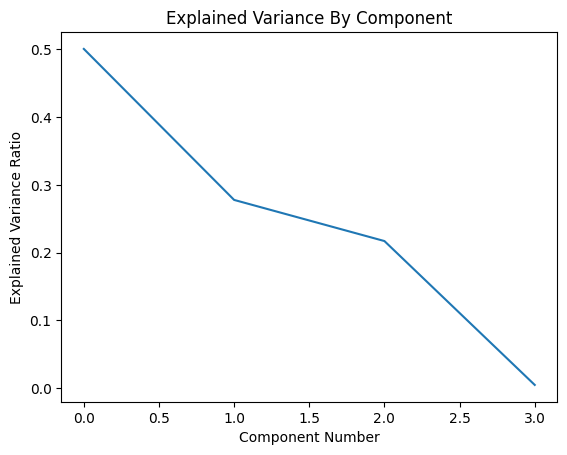

In [9]:
pca = PCA() 
pca.fit(standardized_nc_df)

plt.plot(pca.explained_variance_ratio_) 

plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance By Component')

plt.show()

In [10]:
pca = PCA(n_components = 2) 

pca_df = pd.DataFrame(pca.fit_transform(standardized_nc_df))

pca_df.shape

(33254, 2)

## K-Means Clustering

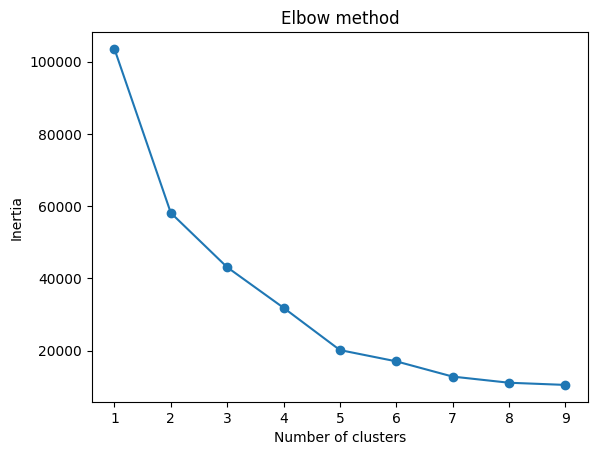

In [11]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=5)
    clusters = kmeans.fit_predict(pca_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(pca_df)

standardized_nc_df["Clusters"] = kmeans.predict(pca_df)

In [13]:
standardized_nc_df['Clusters'].value_counts()

Clusters
0    29236
1     3741
2      277
Name: count, dtype: int64

## Evaluation

In [14]:
standardized_nc_df.columns

Index(['SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC', 'SHIPMT_DIST_ROUTED',
       'Clusters'],
      dtype='object')

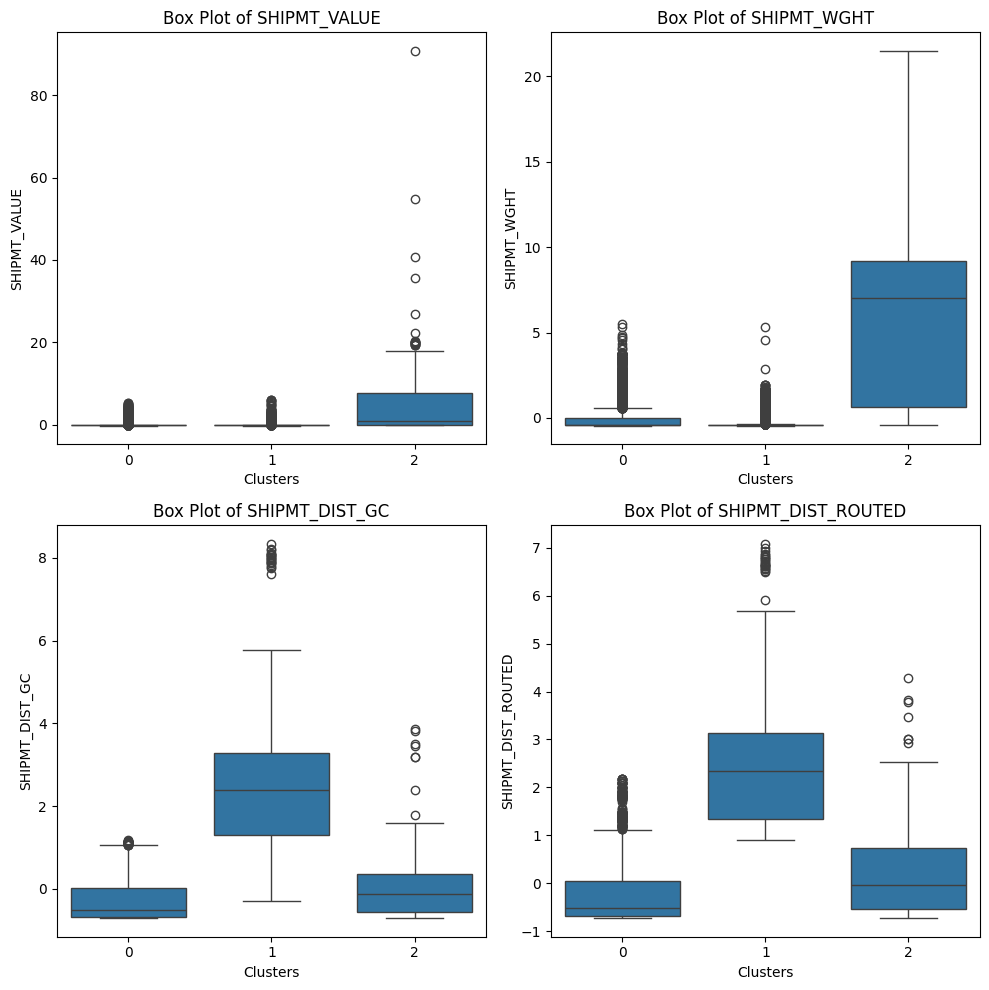

In [15]:
subset = ['SHIPMT_VALUE', 'SHIPMT_WGHT','SHIPMT_DIST_GC', 'SHIPMT_DIST_ROUTED'] 

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs = axs.flatten() # need this to index axis as a 1D array rather than a multidimensional array

i = 0

for column in subset:
    sns.boxplot(data=standardized_nc_df, y=column, x=standardized_nc_df["Clusters"], ax = axs[i])

    # Adding title and labels for each subplot
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

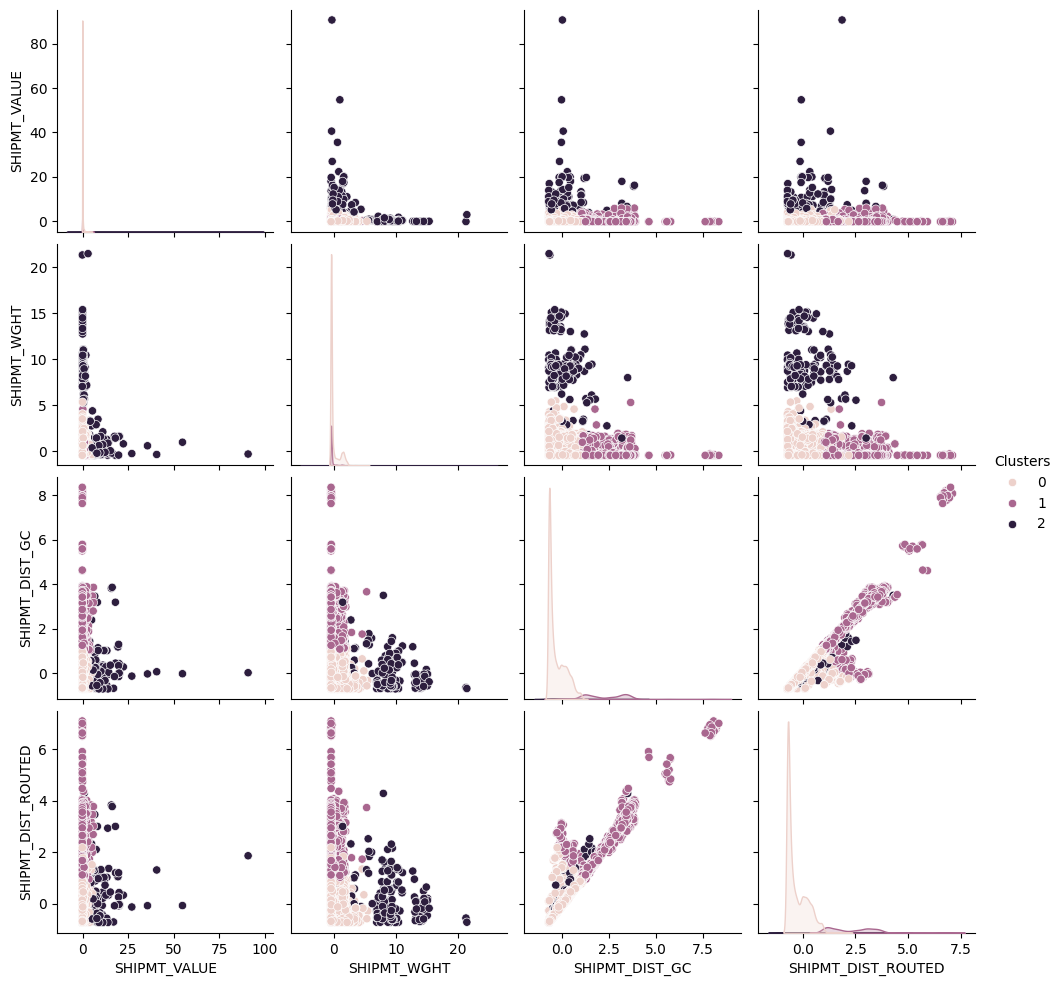

In [16]:
sns.pairplot(standardized_nc_df, hue='Clusters', vars=subset)
plt.show()